# Which Prepaid Plan is Better?

As a Data analyst at a telecommunications operator company called Megaline. The company offers its clients two types of prepaid plans, namely the Surf plan and the Ultimate plan. The advertising department wants to know which prepaid plan generates more revenue, so they can create an advertising budget accordingly.

Need conduct an initial analysis of the prepaid plans based on a relatively small sample of clients. You have 500 Megaline client data, which contains information such as: who they are, where they come from, what type of package they use, and the number of calls and messages they sent in 2018. Your task is to analyze the behavior of the users, and then determine which prepaid package is more profitable.

## Import Library

In [86]:
# Load all library
# Import Library Data Processing
import pandas as pd, numpy as np

# Import Library Data Visualization
import matplotlib.pyplot as plt, seaborn as sns

# Import Library Statistics
from scipy.stats import ttest_ind


## Load the Data

In [87]:
# Load data files into different DataFrames

# Load Data Calls
calls = pd.read_csv('/datasets/megaline_calls.csv')
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [88]:
# Load Data Internet
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [89]:
# Load Data Messages
messages = pd.read_csv('/datasets/megaline_messages.csv')
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [90]:
# Load Data Plans
plans = pd.read_csv('/datasets/megaline_plans.csv')
plans.info()
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [91]:
# Load Data Users
users = pd.read_csv('/datasets/megaline_users.csv')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [92]:
# Duplicate checking
print('message duplicate', messages.duplicated().sum())
print('internet duplicate', internet.duplicated().sum())
print('calls duplicate', calls.duplicated().sum())
print('users duplicate', users.duplicated().sum())
print('plans duplicate', users.duplicated().sum())

message duplicate 0
internet duplicate 0
calls duplicate 0
users duplicate 0
plans duplicate 0


## Data Preparation

In [93]:
# Create a function to get the year-month from each row

def to_month(dataset, col_name):
    temp = pd.to_datetime(dataset[col_name])
    temp = temp.dt.to_period("M")
    return temp

## Prepaid Plan

In [94]:
# Show general information/summary about DataFrame prepaid plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [95]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [96]:
# Show sample data for the packages
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- No Missing data

## Fixing the Data

Findings :

    - There are no missing values ​​or duplications from the five datasets that we have.
    - Date data is still in string format and needs to be converted to date format
    - The five datasets must be combined into one
    - All definitions in one row must be in monthly format

## User

In [97]:
# Display general information/summary about the user's DataFrame

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [98]:
print('users duplicate', users.duplicated().sum())

users duplicate 0


In [99]:
# Display Data sample of users
users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [100]:
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Cape Coral-Fort Myers, FL MSA                       1
Greensboro-High Point, NC MSA                       1
Albany-Schenectady-Troy, NY MSA                     1
Stockton, CA MSA                                    1
Jacksonville, FL MSA                                1
Name: city, Length: 73, dtype: int64

### Fixing the Data

In [101]:
# Clean Data city in users table
users['clean_city'] = users['city'].str.split(', ').str[1]
users['clean_city'] = users['clean_city'].str.replace(' MSA', '')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA


In [102]:
# Make a column marking that the area is NY-NJ and Others
users['is_nynj'] = users['clean_city'].str.contains('NY-NJ', regex=True)
users['is_nynj'] = users['is_nynj'].replace(True, 1).replace(False, 0)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,is_nynj
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA,0


In [103]:
#drop unneeded columns in the users table
users.drop(['city', 'first_name', 'last_name'], axis=1, inplace=True)

In [104]:
users.head(10)

,user_id,age,reg_date,plan,churn_date,clean_city,is_nynj
0,1000,45,2018-12-24,ultimate,NaN,GA,0
1,1001,28,2018-08-13,surf,NaN,WA,0
2,1002,36,2018-10-21,surf,NaN,NV,0
3,1003,52,2018-01-28,surf,NaN,OK,0
4,1004,40,2018-05-23,surf,NaN,WA,0
5,1005,31,2018-11-29,surf,NaN,TX,0
6,1006,73,2018-11-27,ultimate,2018-12-18,CA,0
7,1007,42,2018-07-11,surf,NaN,MI,0
8,1008,53,2018-08-03,ultimate,NaN,FL,0
9,1009,19,2018-04-22,surf,NaN,CA,0


## Calls

In [105]:
# Show general information/summary about the calling DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [106]:
# Show sample data containing calls

calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


### Fixing the Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

In [107]:
# Create a year-month column in the calls table
calls['month'] = to_month(calls, 'call_date')
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [108]:
# Rounding up for the call duration column
calls['duration'] = np.ceil(calls['duration']).astype('int16')
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


In [109]:
# Get monthly data

In [110]:
pd.DataFrame(calls['month'].unique(), columns=['month']).sort_values(by='month')

,month
11,2018-01
10,2018-02
8,2018-03
9,2018-04
7,2018-05
6,2018-06
5,2018-07
4,2018-08
1,2018-09
2,2018-10


## Message/SMS

In [111]:
# Show general information/summary about SMS DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [112]:
# Show sample data for SMS

messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Fixing the data

In [113]:
messages['month'] = to_month(messages, 'message_date')
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [114]:
pd.DataFrame(messages['month'].unique(), columns=['month']).sort_values(by='month')

,month
11,2018-01
10,2018-02
9,2018-03
8,2018-04
7,2018-05
5,2018-06
6,2018-07
2,2018-08
4,2018-09
3,2018-10


## Internet

In [115]:
# Show general information/summary about an internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [116]:
# Show sample data for internet traffic
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


### fixing the Data

In [117]:
# Create a year-month column in the internet table
internet['month'] = to_month(internet, 'session_date')
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


## Study the Terms and Conditions Related to Prepaid Packages

In [118]:
# Display the prepaid plan terms and make sure you understand them
plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregating Data per User

[Now that we have clean data, aggregate the data for each user per period so that we only have one record per user per period. This will facilitate further analysis.]

In [119]:
# Count the number of calls made by each user per month. Save the results.
# Rounding up for the call duration column
calls['duration'] = np.ceil(calls['duration']).astype('int16')
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


In [120]:
# Calculate the number of minutes each user spends on calls per month. Save the results.
# Aggregate calls per month
call_agg = pd.pivot_table(calls, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
call_agg.head()


,user_id,month,duration
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [121]:
# Count the number of SMS sent by each user per month. Save the results.
# Aggregate data messages
message_agg = pd.pivot_table(messages, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
message_agg.columns = ['user_id', 'month', 'sms']
message_agg.head()


,user_id,month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [122]:
# Calculate the volume of internet traffic used by each user per month. Save the results.
# Aggregate internet per month
internet_agg = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_agg.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [123]:
# Convert to GB and if there is an excess, round it up
internet_agg['gb_used'] = np.ceil(internet_agg['mb_used'] / 1024)
internet_agg.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0


In [124]:
# Transform mb per month become gb per month
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

In [125]:
# delete unneeded column
plans.drop('mb_per_month_included', axis=1, inplace=True)

[Unify the aggregate data into one DataFrame so that one record in it will show the consumption level of a unique user in a given month].

In [126]:
# Combine call, minute, SMS and internet data based on user_id and month (month)
# Combine table users with plans
table_users = users.merge(plans, how='left', left_on='plan', right_on='plan_name').drop('plan_name', axis=1)
table_users.tail()

,user_id,age,reg_date,plan,churn_date,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
495,1495,67,2018-09-04,surf,NaN,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
496,1496,49,2018-02-20,surf,NaN,LA,0,50,500,20,10,0.03,0.03,15.0
497,1497,49,2018-12-10,ultimate,NaN,CA,0,1000,3000,70,7,0.01,0.01,30.0
498,1498,51,2018-02-04,surf,NaN,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
499,1499,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0


In [127]:
# create table for cross join
temp_month = pd.DataFrame(internet_agg['month'].unique(), columns=['month']).sort_values(by='month')
temp_month['key'] = 1
temp_month

,month,key
11,2018-01,1
10,2018-02,1
8,2018-03,1
9,2018-04,1
5,2018-05,1
6,2018-06,1
7,2018-07,1
1,2018-08,1
2,2018-09,1
3,2018-10,1


In [128]:
# Get the data for All users
temp_users = pd.DataFrame(users['user_id'].unique(), columns=['user_id']).sort_values(by='user_id')
temp_users['key'] = 1
temp_users.head()

,user_id,key
0,1000,1
1,1001,1
2,1002,1
3,1003,1
4,1004,1


In [129]:
# Create main table to accommodate all user activities
main = temp_users.merge(temp_month, how='inner', on='key').drop('key', axis=1)
main.tail()

,user_id,month
5995,1499,2018-08
5996,1499,2018-09
5997,1499,2018-10
5998,1499,2018-11
5999,1499,2018-12


In [130]:
# Gather all data
df = main.merge(call_agg, how='left', on=['user_id', 'month'])
df = df.merge(internet_agg, how='left', on=['user_id', 'month'])
df = df.merge(message_agg, how='left', on=['user_id', 'month'])
df = df.merge(table_users, how='left', on='user_id')
df.tail(10)

,user_id,month,duration,mb_used,gb_used,sms,age,reg_date,plan,churn_date,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
5990,1499,2018-03,NaN,NaN,NaN,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5991,1499,2018-04,NaN,NaN,NaN,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5992,1499,2018-05,NaN,NaN,NaN,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5993,1499,2018-06,NaN,NaN,NaN,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5994,1499,2018-07,NaN,NaN,NaN,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5995,1499,2018-08,NaN,NaN,NaN,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5996,1499,2018-09,346.0,12984.76,13.0,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5997,1499,2018-10,385.0,19492.43,20.0,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5998,1499,2018-11,308.0,16813.83,17.0,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0
5999,1499,2018-12,496.0,22059.21,22.0,NaN,37,2018-05-06,surf,NaN,FL,0,50,500,20,10,0.03,0.03,15.0


In [131]:
# Create Registered month and churn month
df['reg_date'] = to_month(df, 'reg_date')
df['churn_date'] = to_month(df, 'churn_date')
df.head()

,user_id,month,duration,mb_used,gb_used,sms,age,reg_date,plan,churn_date,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-01,NaN,NaN,NaN,NaN,45,2018-12,ultimate,NaT,GA,0,1000,3000,70,7,0.01,0.01,30.0
1,1000,2018-02,NaN,NaN,NaN,NaN,45,2018-12,ultimate,NaT,GA,0,1000,3000,70,7,0.01,0.01,30.0
2,1000,2018-03,NaN,NaN,NaN,NaN,45,2018-12,ultimate,NaT,GA,0,1000,3000,70,7,0.01,0.01,30.0
3,1000,2018-04,NaN,NaN,NaN,NaN,45,2018-12,ultimate,NaT,GA,0,1000,3000,70,7,0.01,0.01,30.0
4,1000,2018-05,NaN,NaN,NaN,NaN,45,2018-12,ultimate,NaT,GA,0,1000,3000,70,7,0.01,0.01,30.0


In [132]:
# Filter user behavior based on join date and (churn date or still active)

# Loyal: Behavior data after joining and still active (no churn date)
logic_loyal_customer = ((df['month'] >= df['reg_date']) & (df['churn_date'].isnull()))

# Churn: Data behavior after joining and before not withdrawing
logic_churn_customer = ((df['month'] >= df['reg_date']) & (df['month'] <= df['churn_date']))

df = df.loc[logic_loyal_customer | logic_churn_customer]
df.shape

(3313, 19)

In [133]:
# Drop unneeded column
df.drop(['mb_used', 'reg_date', 'churn_date'], axis=1, inplace=True)
df.head()

,user_id,month,duration,gb_used,sms,age,plan,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
11,1000,2018-12,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0
19,1001,2018-08,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
20,1001,2018-09,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
21,1001,2018-10,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0
22,1001,2018-11,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0


In [134]:
# fill missing value in numerikal column with 0
df[['duration', 'gb_used', 'sms']] = df[['duration', 'gb_used', 'sms']].fillna(0)

In [135]:
# Create a column to calculate extra costs on the phone
df['extra_calls'] = (df['duration'] - df['minutes_included']) * df['usd_per_minute']

# Minus price means it is not excessive and must be replaced 0
df.loc[df['extra_calls'] < 0, 'extra_calls'] = 0

In [136]:
# Make a column to calculate extra costs on the internet
df['extra_internet'] = (df['gb_used'] - df['gb_per_month_included']) * df['usd_per_gb']

# Minus price means it is not excessive and must be replaced 0
df.loc[df['extra_internet'] < 0, 'extra_internet'] = 0

In [137]:
# Create a column to calculate extra costs in the message
df['extra_sms'] = (df['sms'] - df['messages_included']) * df['usd_per_message']

# Minus price means it is not excessive and must be replaced 0
df.loc[df['extra_sms'] < 0, 'extra_sms'] = 0

In [138]:
# Kolom Total Income
df['total_income'] = df['usd_monthly_pay'] + df['extra_calls'] + df['extra_internet'] + df['extra_sms']
df.tail()

,user_id,month,duration,gb_used,sms,age,plan,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms,total_income
5995,1499,2018-08,0.0,0.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20.0
5996,1499,2018-09,346.0,13.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20.0
5997,1499,2018-10,385.0,20.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,50.0,0.0,70.0
5998,1499,2018-11,308.0,17.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,20.0,0.0,40.0
5999,1499,2018-12,496.0,22.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,70.0,0.0,90.0


In [139]:
df.head()

,user_id,month,duration,gb_used,sms,age,plan,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms,total_income
11,1000,2018-12,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.00,70.00
19,1001,2018-08,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
20,1001,2018-09,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
21,1001,2018-10,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,70.0,0.09,90.09
22,1001,2018-11,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,40.0,0.00,60.00


In [1]:
# Add the prepaid package information


[Calculate the monthly income of each user (to do this, subtract the free plan limit from the total number of calls, text messages, and data; multiply the result by the call plan value; add the monthly fee based on the call plan type). N.B. The code for this part may not be as simple as we think, considering that the package requirements are quite complicated! Therefore, it doesn't matter if you need more time to work on it.]

In [141]:
# Calculate monthly revenue for each user
# Total Income column
df['total_income'] = df['usd_monthly_pay'] + df['extra_calls'] + df['extra_internet'] + df['extra_sms']
df.tail()

,user_id,month,duration,gb_used,sms,age,plan,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms,total_income
5995,1499,2018-08,0.0,0.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20.0
5996,1499,2018-09,346.0,13.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,20.0
5997,1499,2018-10,385.0,20.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,50.0,0.0,70.0
5998,1499,2018-11,308.0,17.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,20.0,0.0,40.0
5999,1499,2018-12,496.0,22.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,70.0,0.0,90.0


## Studying User Behavior

[Compute some useful descriptive statistical calculations for data that has been aggregated and combined. This is usually able to reveal the overall picture captured by the data. Make some useful graphs to help your understanding. Considering that the main task is to compare prepaid packages and decide which prepaid package is more profitable, statistical calculations and graphs must be carried out based on each package.]

[Relevant instructions are available in the comments section regarding the Call. However, similar comments are not available for SMS and Internet. However, don't worry, the basic principles of statistics for SMS and Internet are the same as for Calls.]

### Calls

In [142]:
# Compare the average call duration of each package per month. Make a bar chart to visualize it.
# Prepare the dataset
call_dur_monthly = pd.pivot_table(df, index='month', columns='plan', values='duration', aggfunc='sum').reset_index()
call_dur_monthly['month'] = call_dur_monthly['month'].astype(str)
call_dur_monthly

plan,month,surf,ultimate
0,2018-01,406.0,774.0
1,2018-02,2673.0,2822.0
2,2018-03,7590.0,3651.0
3,2018-04,17577.0,7074.0
4,2018-05,30768.0,11781.0
5,2018-06,41836.0,17435.0
6,2018-07,54448.0,25197.0
7,2018-08,66438.0,29224.0
8,2018-09,80360.0,37004.0
9,2018-10,99903.0,47393.0


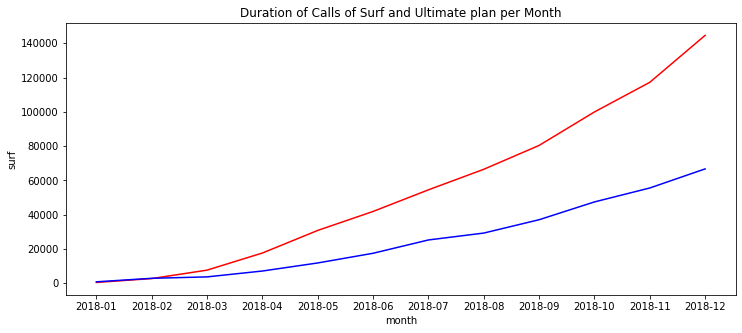

In [143]:
# Compare the number of minutes users need for each package per month. Make a Lineplot.

plt.figure(figsize=(12, 5))
plt.title('Duration of Calls of Surf and Ultimate plan per Month')
sns.lineplot(data=call_dur_monthly, x="month", y="surf", color='red')
sns.lineplot(data=call_dur_monthly, x="month", y="ultimate", color='blue')
plt.show()

[Calculate average and variable call durations to consider whether users on different plans have different call usage behavior.]

In [144]:
# Calculate the mean and variance of the monthly call durations
avg_dur_monthly = pd.pivot_table(df, index='month', columns='plan', values='duration', aggfunc='mean').reset_index()
avg_dur_monthly['month'] = avg_dur_monthly['month'].astype(str)
avg_dur_monthly

plan,month,surf,ultimate
0,2018-01,13.533333,40.736842
1,2018-02,44.550000,91.032258
2,2018-03,84.333333,89.048780
3,2018-04,141.750000,136.038462
4,2018-05,206.496644,181.246154
5,2018-06,231.138122,200.402299
6,2018-07,265.600000,254.515152
7,2018-08,282.714894,254.121739
8,2018-09,315.137255,296.032000
9,2018-10,351.771127,353.679104


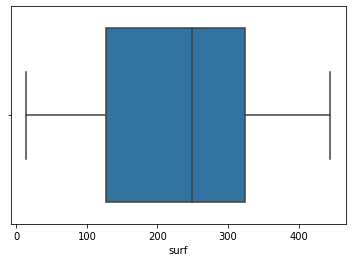

In [145]:
# Create a boxplot graph to visualize the distribution of monthly call durations
sns.boxplot(data=avg_dur_monthly, x='surf')
plt.show()

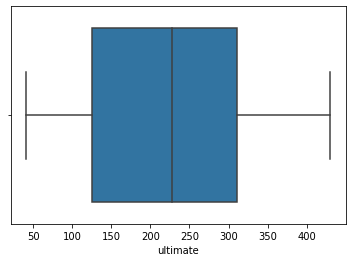

In [146]:
sns.boxplot(data=avg_dur_monthly, x='ultimate')
plt.show()

# Findings

- From February to December the surf package contributes a higher duration than the ultimate package
- Both packages have increasingly sharp duration growth.

# Insights

- The possibility that the total duration of surfing can beat ultimate is the increasing number of users
- Cheaper packages may not necessarily contribute less income.

### Pesan/SMS

In [147]:
# Compare the number of SMS users tend to send per plan per month

sms_monthly = pd.pivot_table(df, index='month', columns='plan', values='sms', aggfunc='sum').reset_index()
sms_monthly['month'] = sms_monthly['month'].astype(str)
sms_monthly

plan,month,surf,ultimate
0,2018-01,21.0,62.0
1,2018-02,108.0,151.0
2,2018-03,351.0,243.0
3,2018-04,870.0,463.0
4,2018-05,1849.0,931.0
5,2018-06,2454.0,1379.0
6,2018-07,3271.0,1937.0
7,2018-08,4662.0,2717.0
8,2018-09,5968.0,3224.0
9,2018-10,7848.0,4140.0


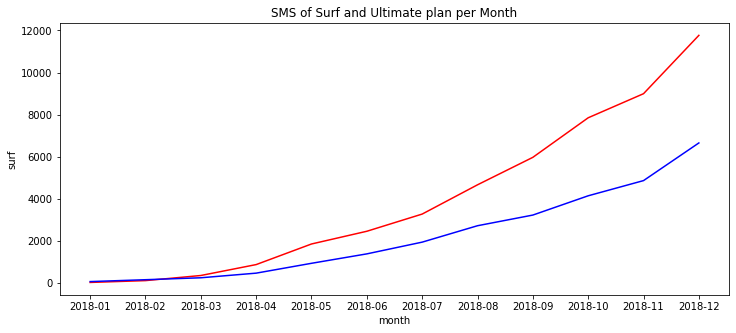

In [148]:
plt.figure(figsize=(12, 5))
plt.title('SMS of Surf and Ultimate plan per Month')
sns.lineplot(data=sms_monthly, x="month", y="surf", color='red')
sns.lineplot(data=sms_monthly, x="month", y="ultimate", color='blue')
plt.show()

# Findings
- From March to December the surf package provides a higher duration contribution than the ultimate package
- Both packages have increasingly sharp SMS growth.

# Insights
- The possibility that the total income in surf is able to beat ultimate is the increasing number of users
- Cheaper packages may not necessarily contribute less income.


### Internet

In [150]:
# Compare the amount of Internet Traffic that users tend to send per package per month
Gb_monthly = pd.pivot_table(df, index='month', columns='plan', values='gb_used', aggfunc='sum').reset_index()
Gb_monthly['month'] = Gb_monthly['month'].astype(str)
Gb_monthly

plan,month,surf,ultimate
0,2018-01,10.0,29.0
1,2018-02,110.0,121.0
2,2018-03,312.0,221.0
3,2018-04,611.0,343.0
4,2018-05,1087.0,489.0
5,2018-06,1502.0,725.0
6,2018-07,2042.0,973.0
7,2018-08,2735.0,1249.0
8,2018-09,3238.0,1444.0
9,2018-10,4058.0,1861.0


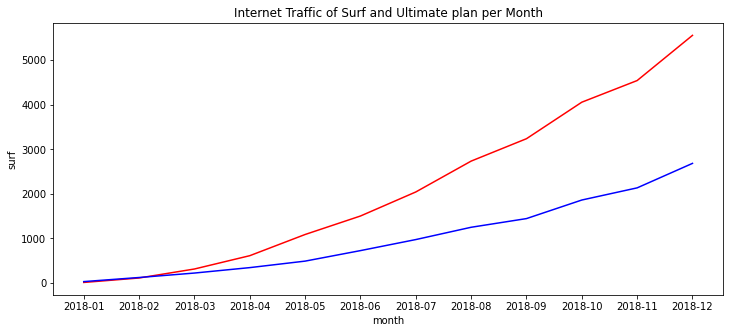

In [151]:
plt.figure(figsize=(12, 5))
plt.title('Internet Traffic of Surf and Ultimate plan per Month')
sns.lineplot(data=Gb_monthly, x="month", y="surf", color='red')
sns.lineplot(data=Gb_monthly, x="month", y="ultimate", color='blue')
plt.show()

# Findings
- From mid-March to December, the surf package contributed higher internet traffic than the ultimate package
- Both packages have increasingly sharp Internet traffic growth.

# Insights
- The possibility that the total income in surf is able to beat ultimate is the increasing number of users
- Cheaper packages may not necessarily contribute less income.

## Income

In [152]:
# Preparing the dataset
income_monthly = pd.pivot_table(df, index='month', columns='plan', values='total_income', aggfunc='sum').reset_index()
income_monthly['month'] = income_monthly['month'].astype(str)
income_monthly

plan,month,surf,ultimate
0,2018-01,600.00,1330.0
1,2018-02,1329.57,2170.0
2,2018-03,2396.65,2926.0
3,2018-04,3515.53,3703.0
4,2018-05,5107.37,4571.0
5,2018-06,6459.80,6167.0
6,2018-07,9263.56,7042.0
7,2018-08,11816.85,8253.0
8,2018-09,12524.67,8925.0
9,2018-10,16298.02,9625.0


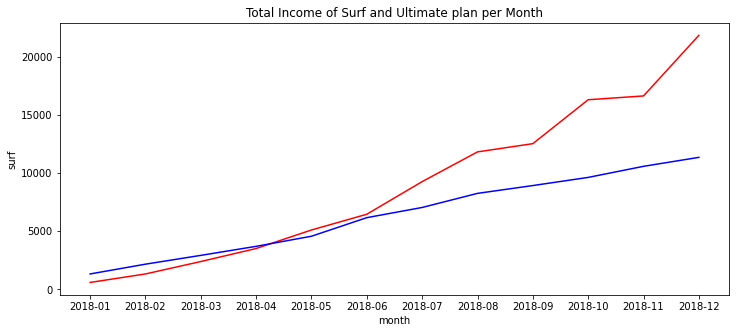

In [153]:
plt.figure(figsize=(12, 5))
plt.title('Total Income of Surf and Ultimate plan per Month')
sns.lineplot(data=income_monthly, x="month", y="surf", color='red')
sns.lineplot(data=income_monthly, x="month", y="ultimate", color='blue')
plt.show()

# Findings
- From April to December the surf package provides a higher income contribution than the ultimate package
- Both packages have increasingly sharp income growth.

# Insights
- The possibility that the total income in surf is able to beat ultimate is the increasing number of users
- Cheaper packages may not necessarily contribute less income.

In [154]:
# Distribution of average user income in each package

# Preparing dataset
avg_user = pd.pivot_table(df, index='user_id', columns='plan', values='total_income', aggfunc='mean').reset_index()

In [155]:
# Get users who use surf plan
avg_surf = avg_user.loc[:, ['user_id', 'surf']].dropna()
avg_surf.head()

plan,user_id,surf
1,1001,50.018000
2,1002,33.333333
3,1003,31.510000
4,1004,76.250000
5,1005,30.000000


In [156]:
avg_ulti = avg_user.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti.head()

plan,user_id,ultimate
0,1000,70.0
6,1006,77.0
8,1008,70.0
11,1011,70.0
13,1013,70.0


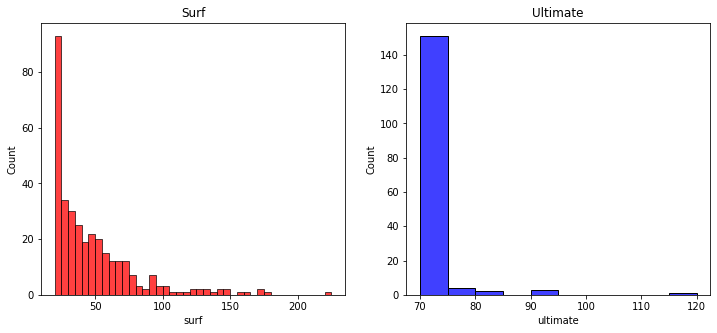

In [157]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(avg_surf['surf'], binwidth=5, color='red')

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(avg_ulti['ultimate'], binwidth=5, color='blue')
plt.show()

In [158]:
# Varians and Standar deviasi
# Surf
surf_std = round(avg_surf['surf'].std(), 1)
surf_var = round(avg_surf['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std}')
print(f'Varians nya {surf_var}')
print()
ulti_std = round(avg_ulti['ultimate'].std(), 1)
ulti_var = round(avg_ulti['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std}')
print(f'Varians nya {ulti_var}')

Surf:
Standar Deviasinya 32.1
Varians nya 1032.8

Ultimate:
Standar Deviasinya 5.2
Varians nya 27.4


# Findings
- In the ultimate package, most users spend around 70-75 dollars.
- in the Surf package, many users exceed their package so the cost reaches more than 20 (ie 25 - 200).
- The standard deviation and variance of surf are 32 and 1032
- The standard deviation and variance of the ultimate are 5 and 27

# Insights
- Few ultimate users add to their packages.
- Many surf users add to their packages and even spend more than the ultimate package.
- Income from Surf customers is more varied than Ultimate because Surf adds more packages. And the added value varies




In [159]:
# Correlation between internet use and total income on surf packages
surf_internet = df.loc[df['plan']=='surf', ['gb_used', 'total_income']]
surf_internet.corr()

,gb_used,total_income
gb_used,1.000000,0.822104
total_income,0.822104,1.000000


In [160]:
df

,user_id,month,duration,gb_used,sms,age,plan,clean_city,is_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,extra_calls,extra_internet,extra_sms,total_income
11,1000,2018-12,124.0,2.0,11.0,45,ultimate,GA,0,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.00,70.00
19,1001,2018-08,182.0,7.0,30.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
20,1001,2018-09,315.0,14.0,44.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
21,1001,2018-10,393.0,22.0,53.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,70.0,0.09,90.09
22,1001,2018-11,426.0,19.0,36.0,28,surf,WA,0,50,500,20,10,0.03,0.03,15.0,0.0,40.0,0.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,2018-08,0.0,0.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
5996,1499,2018-09,346.0,13.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.00,20.00
5997,1499,2018-10,385.0,20.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,50.0,0.00,70.00
5998,1499,2018-11,308.0,17.0,0.0,37,surf,FL,0,50,500,20,10,0.03,0.03,15.0,0.0,20.0,0.00,40.00


In [161]:
# Correlation between internet use and total income in the ultimate package
ulti_internet = df.loc[df['plan']=='ultimate', ['gb_used', 'total_income']]
ulti_internet.corr()

,gb_used,total_income
gb_used,1.000000,0.431055
total_income,0.431055,1.000000


## Testing Statistical Hypotheses

[Test the hypothesis that the average income of Ultimate and Surf prepaid plan users is different.]

[Rumuskan hipotesis nol dan alternatif, pilih pengujian statistiknya, dan tentukan nilai "alpha".]

# Test the hypothesis

## Is the average call usage of Ultimate and Surf package users different?

- Statistical Test: Two independent sample t-test
- Hypotesis
    - H0: Average call usage from ultimate and surf package users is the SAME
    - H1: Average call usage from DIFFERENT ultimate and surf package users
- Alpha: 5%


In [162]:
call_avg = pd.pivot_table(df, index='user_id', columns='plan', values='duration', aggfunc='mean').reset_index()
call_avg

plan,user_id,surf,ultimate
0,1000,NaN,124.0
1,1001,345.600000,NaN
2,1002,276.333333,NaN
3,1003,92.000000,NaN
4,1004,346.500000,NaN
...,...,...,...
495,1495,441.250000,NaN
496,1496,132.272727,NaN
497,1497,NaN,300.0
498,1498,291.909091,NaN


In [163]:
alpha = 0.05
p_value = ttest_ind(call_avg['surf'], call_avg['ultimate'], nan_policy='omit').pvalue
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0: Average call usage from ultimate and surf package users is the SAME')
else:
    print(H1: Average call usage from ultimate and surf package users is DIFFERENT')
print('call Average for surf', call_avg['surf'].mean())
print('call Average for ultimate', call_avg['ultimate'].mean())

P-Value: 0.37549429942932155
H0 Diterima: Rata-rata penggunaan call dari pengguna paket ultimate dan surf SAMA
Rata2 call di surf 306.65801749053963
Rata2 call di ultimate 288.89331894813256


Findings
- P-Value from statistical test of average calls between surf and ultimate packages is 37%
- There is no difference in call rates between surf and ultimate packages.

Insights
- Users who use the ultimate and surf packages have the same behavior calls.
- This means that surf package users use calls more than that because the duration is the same as in ultimate

Recommendation
 We can make sub packages for surfing, especially call packages. because many users exceed the limit.


[Formulate the null and alternative hypotheses, select the statistical tests, and determine the "alpha" value.]

In [167]:
tincome_avg = pd.pivot_table(df, index='user_id', columns='is_nynj', values='total_income', aggfunc='mean').reset_index()
tincome_avg

is_nynj,user_id,0,1
0,1000,70.000000,NaN
1,1001,50.018000,NaN
2,1002,33.333333,NaN
3,1003,31.510000,NaN
4,1004,76.250000,NaN
...,...,...,...
495,1495,NaN,118.325000
496,1496,23.636364,NaN
497,1497,70.000000,NaN
498,1498,NaN,77.272727


In [170]:
# Test the hypothesis
alpha = 0.05
p_value = ttest_ind(tincome_avg[1], tincome_avg[0], nan_policy='omit').pvalue
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Accepted: The average income of users in NY-NJ ultimate and other cities is the SAME')
else:
    print('H1 Accepted: Average Income of NY-NJ ultimate city users and other cities is DIFFERENT ')
print('Revenue di NY-NJ', tincome_avg[1].mean())
print('Revenue di Lain kota', tincome_avg[0].mean())

P-Value: 0.6640485632889678
H0 Diterima: Rata-rata Income dari pengguna kota NY-NJ ultimate dan lain kota SAMA
Pendapatan di NY-NJ 53.64276270292207
Pendapatan di Lain kota 55.175340766508626


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Findings

   P-Value from statistical test of average calls between surf and ultimate packages is 66%
    There is no difference in average income in NY-NJ City and other cities.
    
</div>





## General Conclusion


<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>

- Few ultimate users add to the package.
- Many surf users add to their packages and even spend more than the ultimate package.
- Income from Surf customers is more varied than Ultimate because Surf adds more packages. And the added value varies
- The surf package provides a higher contribution than the ultimate package
- Both packages have increasingly sharp duration growth.
- Users who use the ultimate and surf packages have the same behavior calls.
- This means that surf package users use calls more than that because the duration is the same as in ultimate
- There is no difference in call rates between surf and ultimate packages.
- There is no difference in average income in NY-NJ City and other cities.   
    
    
</div>


